In [1]:
import pandas as pd
import numpy as np 


In [2]:
balanced=pd.read_csv('Final_data.csv')

In [18]:
balanced.head()

,url_length,num_dots,has_hyphen,has_at_symbol,path_length,query_length,num_params,tld_length,uses_https,url_depth,...,has_hex_chars,file_extension_length,num_underscores,netblock_owner,asn,reverse_dns_present,organisation,dnsssec,is_netblock_trusted,class
0,62.0,2.0,0.0,0.0,39.0,0.0,0.0,2.0,1.0,4.0,...,0.0,0.0,0.0,"GleSYS Customer servers, Stockholm",42708.0,1.0,0.0,1.0,0,0.0
1,53.0,2.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,1.0,"Vercel, Inc",16509.0,0.0,1.0,1.0,0,1.0
2,36.0,3.0,0.0,0.0,14.0,0.0,0.0,3.0,1.0,2.0,...,0.0,4.0,0.0,"Aliyun Computing Co., LTD",37963.0,0.0,0.0,0.0,1,0.0
3,24.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,...,0.0,0.0,0.0,6 COLLYER QUAY,132203.0,0.0,0.0,0.0,0,1.0
4,55.0,2.0,0.0,0.0,9.0,0.0,0.0,3.0,1.0,1.0,...,0.0,0.0,1.0,"Vercel, Inc",16509.0,0.0,1.0,1.0,0,1.0


In [41]:
numeric = balanced.select_dtypes(include='number').columns.tolist()
categorical = balanced.select_dtypes(exclude='number').columns.tolist()


In [20]:
balanced.columns

Index(['url_length', 'num_dots', 'has_hyphen', 'has_at_symbol', 'path_length',
       'query_length', 'num_params', 'tld_length', 'uses_https', 'url_depth',
       'has_ip', 'domain_length', 'num_subdomains', 'contains_suspicious_word',
       'hostname_length', 'has_port', 'num_special_chars', 'is_shortened',
       'fragment_length', 'double_slash_pos', 'digit_to_length_ratio',
       'num_unique_chars', 'has_hex_chars', 'file_extension_length',
       'num_underscores', 'netblock_owner', 'asn', 'reverse_dns_present',
       'organisation', 'dnsssec', 'is_netblock_trusted', 'class'],
      dtype='object')

## Distribution

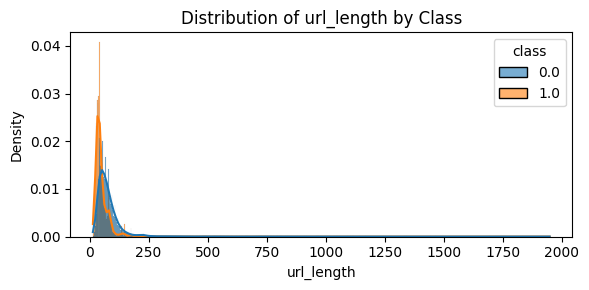

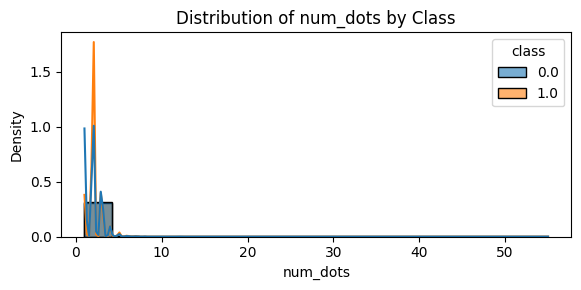

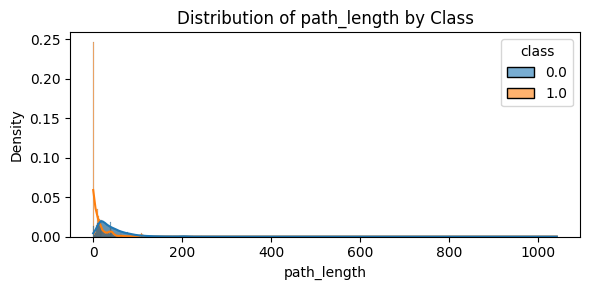

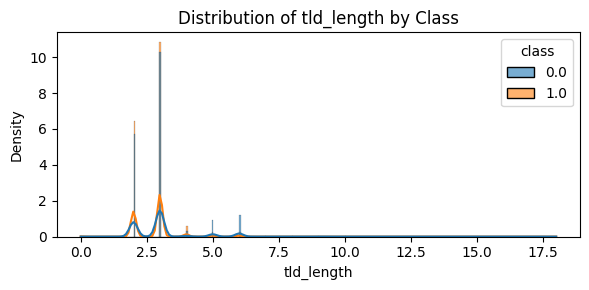

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['url_length', 'num_dots', 'path_length', 'tld_length']
for col in features_to_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(data=balanced, x=col,
                 hue='class', kde=True, stat='density',
                 common_norm=False, alpha=0.6)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


## Violin Plots

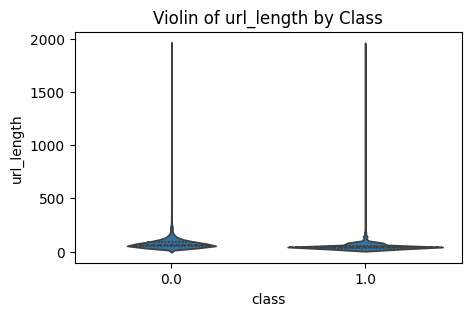

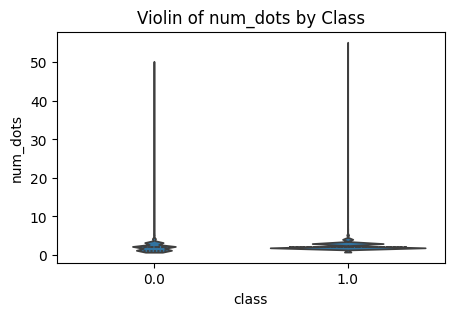

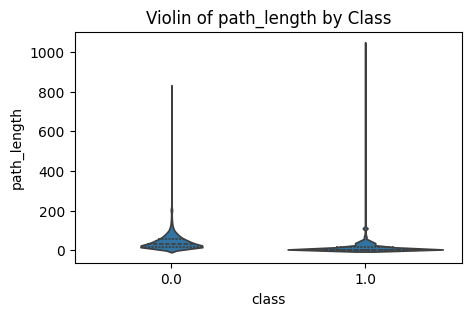

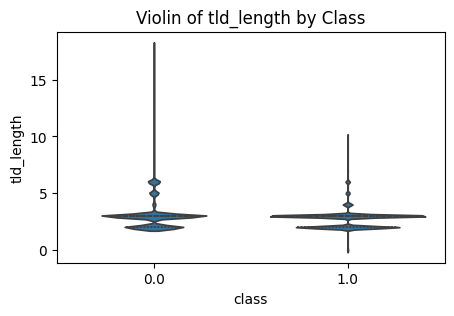

In [6]:
for col in features_to_plot:
    plt.figure(figsize=(5,3))
    sns.violinplot(data=balanced, x='class', y=col, inner='quartile')
    plt.title(f'Violin of {col} by Class')
    plt.xlabel('class')
    plt.ylabel(col)
    plt.show()


## Correlation

Top 10 features by |corr| with class:
 class                  1.000000
url_depth              0.513487
domain_length          0.465028
hostname_length        0.464893
path_length            0.401912
has_hyphen             0.315588
organisation           0.279027
uses_https             0.264435
double_slash_pos       0.264074
reverse_dns_present    0.248704
dtype: float64


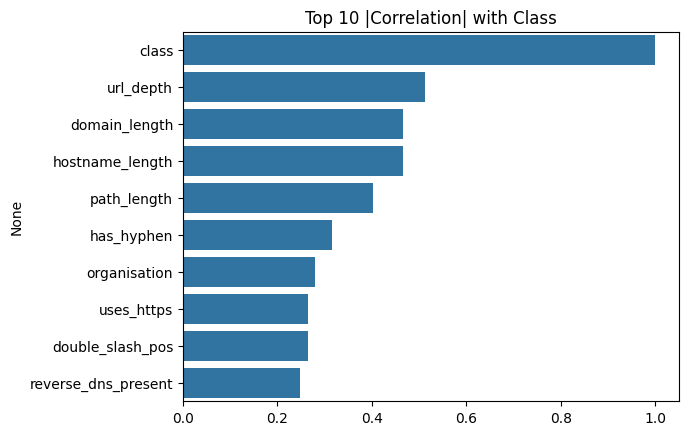

In [ ]:
corr_series = balanced[numeric].corrwith(balanced['class']).abs().sort_values(ascending=False)
print("Top  features by |corr| with class:\n", corr_series.head(10))
sns.barplot(x=corr_series.head(10).values, y=corr_series.head(10).index)
plt.title("Top 10 |Correlation| with Class")
plt.show()


## Top 10 netblock_owner:


Top 10 netblock_owner:
                           count  phish_rate
netblock_owner                             
Lefkoff Industries          643    1.000000
GitHub, Inc.               1993    0.988961
Vercel, Inc                3851    0.978447
Weebly, Inc.               2492    0.960273
Cloudflare, Inc.          12382    0.648037
Google LLC                 2972    0.561911
Amazon Technologies Inc.   1016    0.543307
Amazon.com, Inc.           1053    0.281102
unknown                    1693    0.210868
Shopify, Inc.              1712    0.000000


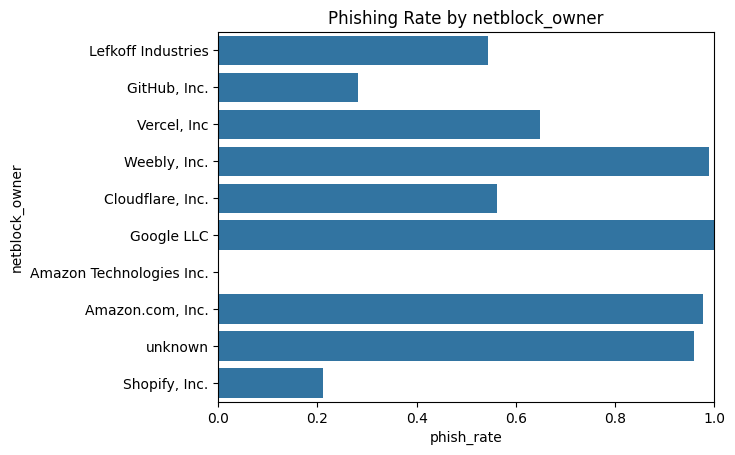


Top 10 organisation:
               count  phish_rate
organisation                   
1.0           32641    0.603260
0.0           17881    0.311504


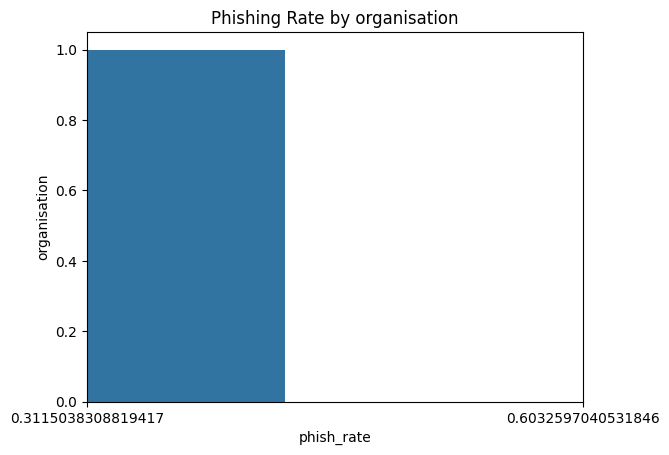


Top 10 asn:
           count  phish_rate
asn                        
27647.0    2485    0.962978
132203.0    562    0.939502
54113.0    2855    0.913485
16509.0    7094    0.787426
15169.0    1448    0.687155
13335.0   14054    0.572293
396982.0   1291    0.396592
16276.0     860    0.119767
47583.0     788    0.100254
24940.0     757    0.084544


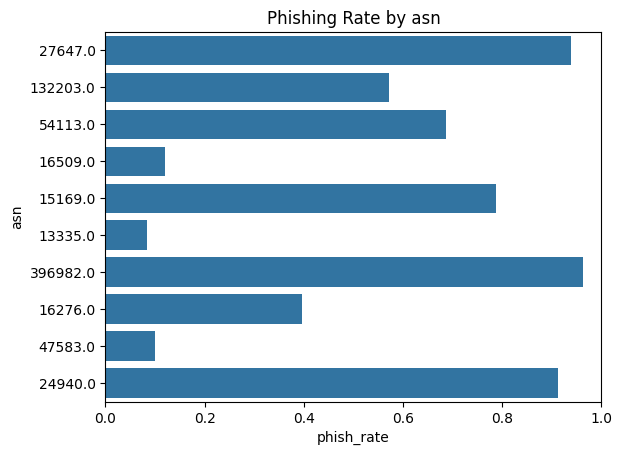

In [ ]:
for col in ['netblock_owner','organisation','asn']:
    top10 = balanced[col].value_counts().nlargest(10).index
    df10  = balanced[balanced[col].isin(top10)]
    summary = df10.groupby(col)['class'].agg(['count','mean']).rename(columns={'mean':'phish_rate'})
    print(f"\nTop 10 {col}:\n", summary.sort_values('phish_rate', ascending=False))
    sns.barplot(x='phish_rate', y=summary.sort_values('phish_rate', ascending=False).index, data=summary)
    plt.xlim(0,1)
    plt.title(f'Phishing Rate by {col}')
    plt.show()
